In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

In [ ]:
customer_data = pd.read_csv('/content/Mall_Customers.csv')
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Minimum Age of a Mall Customer

In [ ]:
print('Minimum Age of a Mall Customer:',min(customer_data['Age']))

Minimum Age of a Mall Customer: 18


## Maximum Age of a Mall Customer

In [ ]:
print('Maximum Age of a Mall Customer:',max(customer_data['Age']))

Maximum Age of a Mall Customer: 70


## Handling Outliers

Text(0.5, 1.0, 'oultier detection using boxplot for Annual Income')

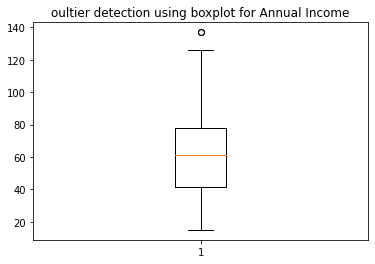

In [ ]:
plt.boxplot(customer_data['Annual Income (k$)'])
plt.title('oultier detection using boxplot for Annual Income')

In [ ]:
Q1 = customer_data['Annual Income (k$)'].quantile(0.25)
Q3 = customer_data['Annual Income (k$)'].quantile(0.75)
Q1, Q3

(41.5, 78.0)

In [ ]:
IQR = Q3 - Q1
IQR

36.5

In [ ]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-13.25, 132.75)

In [ ]:
customer_data[(customer_data['Annual Income (k$)']<lower_limit)|(customer_data['Annual Income (k$)']>upper_limit)]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
customer_data = customer_data[(customer_data['Annual Income (k$)']>lower_limit)&(customer_data['Annual Income (k$)']<upper_limit)]
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


## Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


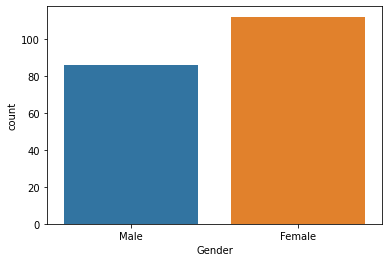

In [ ]:
sns.countplot(customer_data['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


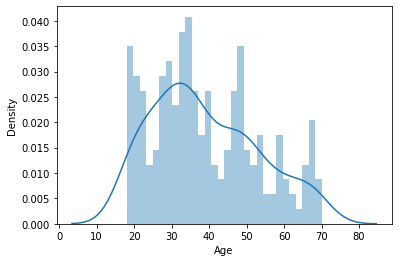

In [ ]:
sns.distplot(customer_data['Age'], bins=30)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


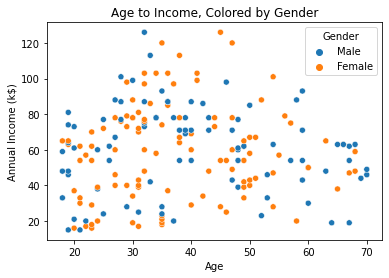

In [ ]:
sns.scatterplot('Age', 'Annual Income (k$)', hue='Gender', data=customer_data);
plt.title('Age to Income, Colored by Gender');

In [ ]:
women_customer_data = customer_data[customer_data.Gender == 'Female']
women_customer_data.tail(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


In [ ]:
men_customer_data = customer_data[customer_data.Gender == 'Male']
men_customer_data.tail(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
187,188,Male,28,101,68
192,193,Male,33,113,8
197,198,Male,32,126,74


## Bar Plot to depict the relationship between the spending 
## score(1-100) and no of customer counts(male 
## customers)

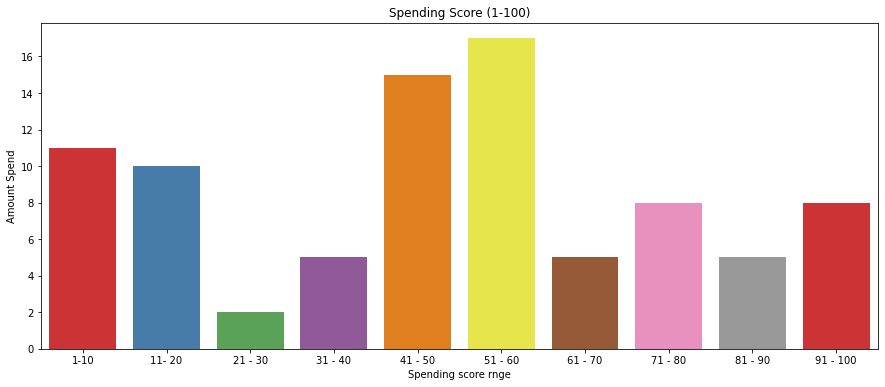

In [ ]:
spend_men_0 = men_customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 1) & (customer_data["Spending Score (1-100)"] <= 10)]
spend_men_1 = men_customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 11) & (customer_data["Spending Score (1-100)"] <= 20)]
spend_men_2 = men_customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 21) & (customer_data["Spending Score (1-100)"] <= 30)]
spend_men_3  = men_customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 31) & (customer_data["Spending Score (1-100)"] <= 40)]
spend_men_4 = men_customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 41) & (customer_data["Spending Score (1-100)"] <= 50)]
spend_men_5 =men_customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 51) & (customer_data["Spending Score (1-100)"] <= 60)]
spend_men_6 = men_customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 61) & (customer_data["Spending Score (1-100)"] <= 70)]
spend_men_7 = men_customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 71) & (customer_data["Spending Score (1-100)"] <= 80)]
spend_men_8 = men_customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 81) & (customer_data["Spending Score (1-100)"] <= 90)]
spend_men_9 = men_customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 91) & (customer_data["Spending Score (1-100)"] <= 100)]




aix = ["1-10","11- 20","21 - 30","31 - 40","41 - 50","51 - 60","61 - 70","71 - 80","81 - 90","91 - 100"]
aiy = [len(spend_men_0.values),len(spend_men_1.values), len(spend_men_2.values), len(spend_men_3.values), len(spend_men_4.values), len(spend_men_5.values),len(spend_men_6.values),len(spend_men_7.values),len(spend_men_8.values),len(spend_men_9.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set1")
plt.title("Spending Score (1-100)")
plt.xlabel("Spending score rnge")
plt.ylabel("Amount Spend")
plt.show()

## Bar Plot to depict the relationship between the spending score(1-100) and no ## of customer counts(female customers)

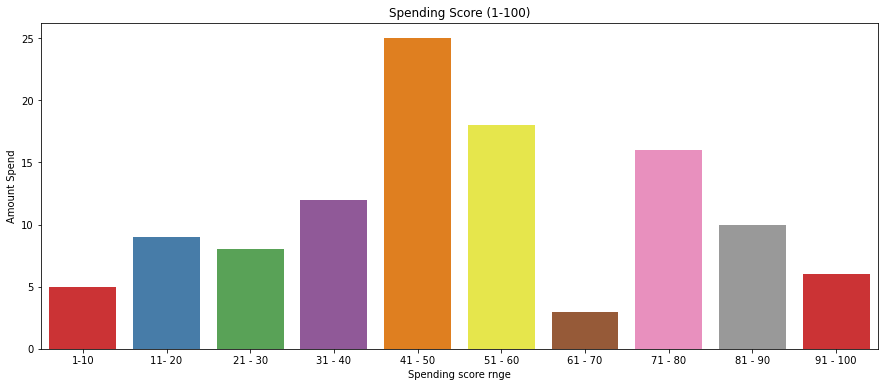

In [ ]:
spend_men_0 = women_customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 1) & (customer_data["Spending Score (1-100)"] <= 10)]
spend_men_1 = women_customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 11) & (customer_data["Spending Score (1-100)"] <= 20)]
spend_men_2 = women_customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 21) & (customer_data["Spending Score (1-100)"] <= 30)]
spend_men_3  = women_customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 31) & (customer_data["Spending Score (1-100)"] <= 40)]
spend_men_4 = women_customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 41) & (customer_data["Spending Score (1-100)"] <= 50)]
spend_men_5 = women_customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 51) & (customer_data["Spending Score (1-100)"] <= 60)]
spend_men_6 = women_customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 61) & (customer_data["Spending Score (1-100)"] <= 70)]
spend_men_7 = women_customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 71) & (customer_data["Spending Score (1-100)"] <= 80)]
spend_men_8 = women_customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 81) & (customer_data["Spending Score (1-100)"] <= 90)]
spend_men_9 = women_customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 91) & (customer_data["Spending Score (1-100)"] <= 100)]




aix = ["1-10","11- 20","21 - 30","31 - 40","41 - 50","51 - 60","61 - 70","71 - 80","81 - 90","91 - 100"]
aiy = [len(spend_men_0.values),len(spend_men_1.values), len(spend_men_2.values), len(spend_men_3.values), len(spend_men_4.values), len(spend_men_5.values),len(spend_men_6.values),len(spend_men_7.values),len(spend_men_8.values),len(spend_men_9.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set1")
plt.title("Spending Score (1-100)")
plt.xlabel("Spending score rnge")
plt.ylabel("Amount Spend")
plt.show()

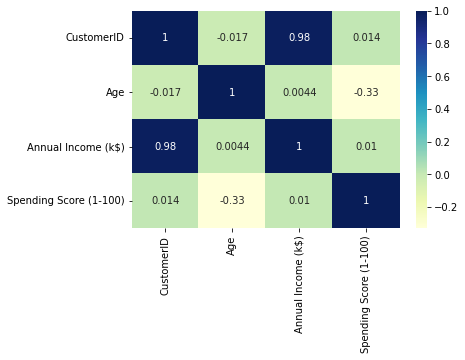

In [ ]:
sns.heatmap(data = customer_data.corr(),cmap = 'YlGnBu',annot = True)

# FEATURE ENGINEERING

## LABEL ENCODING THE GENDER

In [ ]:
customer_data = customer_data.copy()
customer_data['Gender'] = np.where(customer_data['Gender'].str.contains('Male'), 1, 0)

customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## K MEANS

## Gaining Insight from Age and Annual Income(k$)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(customer_data[['Age','Annual Income (k$)']])
    sse.append(km.inertia_)

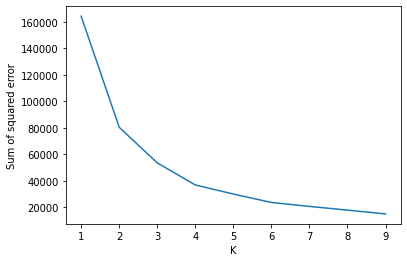

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(customer_data[['Age','Annual Income (k$)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [ ]:
customer_data['cluster']=y_predicted
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1


In [ ]:
km.cluster_centers_

array([[34.42222222, 81.62222222],
       [28.36      , 31.44      ],
       [55.03448276, 50.34482759]])

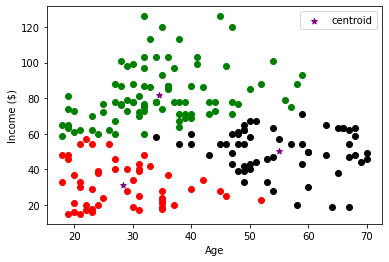

In [ ]:
df1 = customer_data[customer_data.cluster==0]
df2 = customer_data[customer_data.cluster==1]
df3 = customer_data[customer_data.cluster==2]
plt.scatter(df1.Age,df1['Annual Income (k$)'],color='green')
plt.scatter(df2.Age,df2['Annual Income (k$)'],color='red')
plt.scatter(df3.Age,df3['Annual Income (k$)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(customer_data[['Annual Income (k$)']])
customer_data['Annual Income (k$)'] = scaler.transform(customer_data[['Annual Income (k$)']])

scaler.fit(customer_data[['Age']])
customer_data['Age'] = scaler.transform(customer_data[['Age']])

In [ ]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,0.019231,0.000000,39,1
1,2,1,0.057692,0.000000,81,1
2,3,0,0.038462,0.009009,6,1
3,4,0,0.096154,0.009009,77,1
4,5,0,0.250000,0.018018,40,1


In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(customer_data[['Age','Annual Income (k$)']])
y_predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 0, 0, 2, 0, 0, 2,
       1, 0, 0, 2, 0, 1, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
customer_data['cluster']=y_predicted
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,0.019231,0.000000,39,2
1,2,1,0.057692,0.000000,81,2
2,3,0,0.038462,0.009009,6,2
3,4,0,0.096154,0.009009,77,2
4,5,0,0.250000,0.018018,40,2


In [ ]:
km.cluster_centers_

array([[0.72283272, 0.32389532],
       [0.32914201, 0.61365211],
       [0.14878543, 0.2038881 ]])

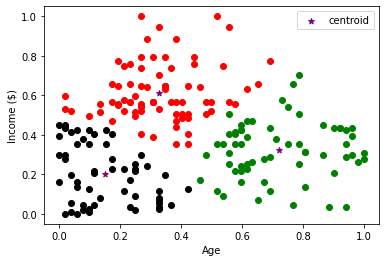

In [ ]:
df1 = customer_data[customer_data.cluster==0]
df2 = customer_data[customer_data.cluster==1]
df3 = customer_data[customer_data.cluster==2]
plt.scatter(df1.Age,df1['Annual Income (k$)'],color='green')
plt.scatter(df2.Age,df2['Annual Income (k$)'],color='red')
plt.scatter(df3.Age,df3['Annual Income (k$)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

## Gaining Insight from Annual Income and Spending Score

In [ ]:
sse = []
k_rng = range(1,11)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(customer_data[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

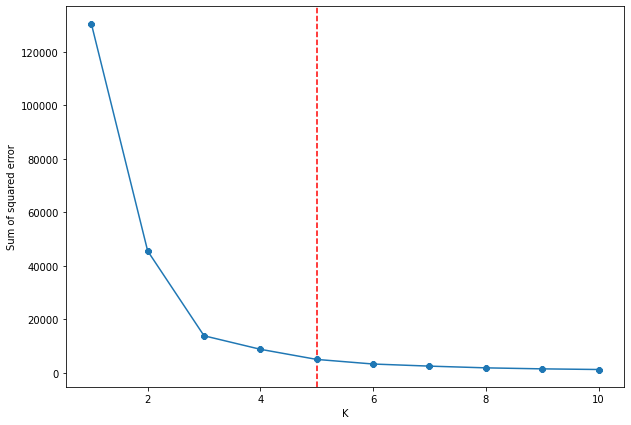

In [ ]:
plt.figure(figsize=(10,7))
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.axvline(x=5, ls='--',color="red")
plt.plot(k_rng,sse,marker="8")

In [ ]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(customer_data[['Annual Income (k$)','Spending Score (1-100)']])
y_predicted

array([1, 4, 3, 4, 1, 4, 3, 2, 3, 4, 3, 2, 3, 4, 3, 4, 1, 4, 1, 2, 1, 4,
       3, 4, 3, 4, 1, 0, 1, 2, 3, 4, 3, 2, 3, 4, 3, 4, 1, 4, 1, 2, 1, 0,
       1, 4, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 4, 1, 2, 3, 4, 3, 4,
       1, 4, 3, 2, 3, 4, 3, 4, 3, 2, 1, 2, 3, 2, 1, 4, 3, 2, 3, 2, 3, 4,
       3, 2, 3, 4, 3, 4, 1, 2, 3, 2, 1, 4, 3, 2, 1, 0, 3, 4, 3, 2, 3, 2,
       3, 4, 3, 2, 1, 2, 3, 2, 1, 2, 3, 4, 3, 2, 3, 4, 3, 2, 3, 4, 1, 4],
      dtype=int32)

In [ ]:
customer_data['cluster2']=y_predicted
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,cluster2
0,1,1,0.019231,0.000000,39,2,1
1,2,1,0.057692,0.000000,81,2,4
2,3,0,0.038462,0.009009,6,2,3
3,4,0,0.096154,0.009009,77,2,4
4,5,0,0.250000,0.018018,40,2,1


In [ ]:
km.cluster_centers_

array([[ 0.35178727, 52.79032258],
       [ 0.3768018 , 37.        ],
       [ 0.50900901, 91.        ],
       [ 0.46348981, 11.68421053],
       [ 0.38006757, 74.25      ]])

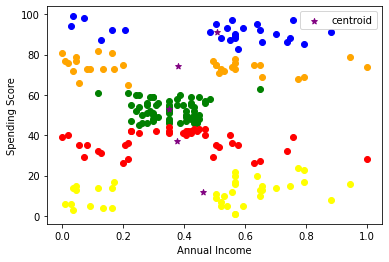

In [ ]:
df0 = customer_data[customer_data.cluster2==0]
df1 = customer_data[customer_data.cluster2==1]
df2 = customer_data[customer_data.cluster2==2]
df3 = customer_data[customer_data.cluster2==3]
df4 = customer_data[customer_data.cluster2==4]

plt.scatter(df0['Annual Income (k$)'],df0['Spending Score (1-100)'],color='green')
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='red')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='blue')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='yellow')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='orange')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

In [ ]:
scaler.fit(customer_data[['Spending Score (1-100)']])
customer_data['Spending Score (1-100)'] = scaler.transform(customer_data[['Spending Score (1-100)']])

In [ ]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,cluster2
0,1,1,0.019231,0.000000,0.387755,2,1
1,2,1,0.057692,0.000000,0.816327,2,4
2,3,0,0.038462,0.009009,0.051020,2,3
3,4,0,0.096154,0.009009,0.775510,2,4
4,5,0,0.250000,0.018018,0.397959,2,1


In [ ]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(customer_data[['Annual Income (k$)','Spending Score (1-100)']])
y_predicted

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 4,
       3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 2, 4, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2],
      dtype=int32)

In [ ]:
customer_data['cluster2']=y_predicted
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,cluster2
0,1,1,0.019231,0.000000,0.387755,2,3
1,2,1,0.057692,0.000000,0.816327,2,1
2,3,0,0.038462,0.009009,0.051020,2,3
3,4,0,0.096154,0.009009,0.775510,2,1
4,5,0,0.250000,0.018018,0.397959,2,3


In [ ]:
km.cluster_centers_

array([[0.64272844, 0.16909621],
       [0.0966421 , 0.79962894],
       [0.63252726, 0.82760473],
       [0.10184097, 0.20319432],
       [0.36114865, 0.49706633]])

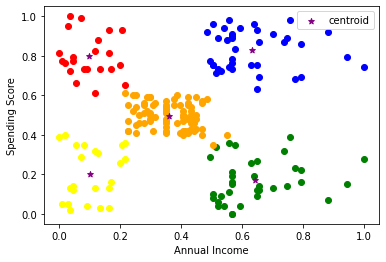

In [ ]:
df0 = customer_data[customer_data.cluster2==0]
df1 = customer_data[customer_data.cluster2==1]
df2 = customer_data[customer_data.cluster2==2]
df3 = customer_data[customer_data.cluster2==3]
df4 = customer_data[customer_data.cluster2==4]

plt.scatter(df0['Annual Income (k$)'],df0['Spending Score (1-100)'],color='green')
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='red')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='blue')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='yellow')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='orange')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()